# Introduction

##### Titanic  was a British passenger liner operated by the White Star Line. Titanic was on its way from Southampton to New York City when it sank in the North Atlantic Ocean in the early morning hours of 15 April 1912 after Titanic collided with an iceberg. The ship carried 2224 people, considering passengers and crew aboard,1514 of them died.

##### Titanic carried 16 wooden lifeboats and four collapsibles, which could accommodate 1,178 people, only one-third of Titanic's total capacity (and 53% of real number of passengers). At the time, lifeboats were intended to ferry survivors from a sinking ship to a rescuing ship—not keep afloat the whole population or power them to shore. If the SS Californian would responded to Titanic's distress calls, the lifeboats may have been adequate to ferry the passengers to safety as planned, but it didn't happen and the only way to survive were to get on the lifeboat.

## This Project revoles around the Exploratory Data Analysis of the Titanic Dataset

###### Loading Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import plotly.figure_factory as ff


###### Setting Up directory

In [86]:
import os 

In [87]:
os.chdir('/Users/lloydfernandes/Documents/Python Tutorial/Titanic EDA')

##### Loading Train dataset in data_1 and and test dataset to data_2

In [88]:
data_1 = pd.read_csv('train.csv')
data_2 =pd.read_csv('test.csv')

In [89]:
data_1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [90]:
data_1.shape

(891, 12)

In [91]:

data_2.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [92]:
data_2.shape

(418, 11)

##### Observation: The Train dataset contains 891 rows with 12 columns were as the test dataset contains 418 rows with 11 columns. The Traget variable ('Survived' is missing from the test dataset)

###### Merging the dataset into a single 'all_data' data frame

In [93]:
all_data = pd.concat([data_1,data_2])

In [94]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
all_data.shape

(1309, 12)

## Exploratory Data Analysis

In [96]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


##### Checking For Null values

In [97]:
all_data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

##### Observation: 
- There are 418 nulls in 'Survived' due to the absence of this data in the test_dataset.
- 1014 Nulls in Cabin and 263 Nulls in Age. Fare also has a null Variable

### 1. Exploring The Target Variable- Survived

Text(0.5, 0, 'Passengers Status (Drowned/Survived)')

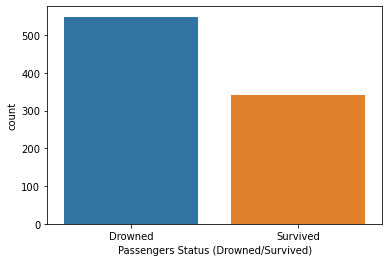

In [98]:
sns.countplot(x='Survived', data=all_data)
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.xlabel('Passengers Status (Drowned/Survived)')

In [99]:
all_data['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

##### Observation:
- The Survived column seems to be very clean, with only 0,1 acting as booleans to describe drowned or survived.
- 38% of the passengers survived, 61% had drowned.
- According to research, The lifeboats had the capacity to save 53% of total Passengers

### 2. Exploring The Variable- Age

#### 2.1 - Age

In [101]:
px.histogram(all_data[all_data['Age']>0], x='Age')

In [102]:
all_data['Age'].describe().reset_index()

,index,Age
0,count,1046.000000
1,mean,29.881138
2,std,14.413493
3,min,0.170000
4,25%,21.000000
5,50%,28.000000
6,75%,39.000000
7,max,80.000000


##### Obervation:
- The youngest passenger was 0.17 years old, oldest being 80.00 years
- Average age of the passengers was 29.88
- The data is right skewed, Slightly biased to the left

#### 2.2 - Age Vs Survivng Status

In [103]:
all_data.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [104]:
px.box(all_data, x="Survived", y="Age", points="all")

##### Observation:
- Maximum chance of survival was for people between the age 19 and 36
- Maximum deaths were between the age group 21 and 39
- The youngest person to die was 1 year old

#### 2.3 - Age Vs Pclass

In [105]:
all_data.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.159930,14.548028,0.92,28.0,39.0,50.0,80.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.0,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.0,74.0


In [106]:

import plotly.graph_objects as go
fig = go.Figure(data=go.Violin(y=all_data['Age'],x=all_data['Pclass'], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='Total Bill'))

fig.update_layout(yaxis_zeroline=False)
fig.show()

##### Obervation:
- Pclass 1 seems to be evenly distributed
- Youngest passenger has a Pclass 3 ticket and the oldest passenger has a Plcass 1 ticket
- The data for Pclass 2 and Pclass 3 is right skewed.
- Passengers on the Pclass 1 ticket are generally older compared to Pclass 2 and Plcass 1, 
  This can be articulated by assuming that greater the age higher are the chances for affording a Pclass 1 ticket

#### 2.3 - Age Vs Pclass Vs Gender

In [107]:
all_data['Sex'].value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [108]:
all_data.groupby(['Sex','Pclass'])['Age'].describe()

count       mean        std   min   25%   50%    75%   max
Sex    Pclass                                                            
female 1       133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
       2       103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
       3       152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
male   1       151.0  41.029272  14.578529  0.92  30.0  42.0  50.00  80.0
       2       158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
       3       349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

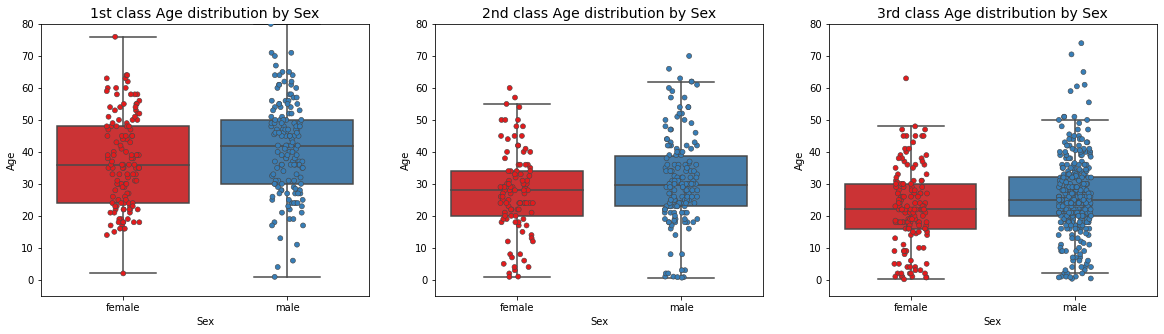

In [114]:
age_Pclass1 = all_data[(all_data['Age']>0) & (all_data['Pclass']==1)]
age_Pclass2 = all_data[(all_data['Age']>0) & (all_data['Pclass']==2)]
age_Pclass3 = all_data[(all_data['Age']>0) & (all_data['Pclass']==3)]

plt.figure(figsize=(20, 5))
palette = "Set1"

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_Pclass1,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_Pclass1,
     linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_Pclass2,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_Pclass2,
     linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)



plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = age_Pclass3,
     order = ['female', 'male'], palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_Pclass3,
     order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()

##### Obervation:
- 65% of the passengers were male and 35% of them were female
- The oldest passenger is a male and the youngest passenger is a female 
- The average age of male and female reduces as we move from Pclass1 to Pclass3
- Most Passengers in Pclass 3 are insided the inter quartile range

### 3. Exploring The Variable- Name

In [130]:
all_data['Title'] = all_data['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0].str.strip(' ')

In [131]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0,Title
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,NaN,Mr
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN,Mrs
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN,Miss
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,NaN,Mrs
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,NaN,Mr


<AxesSubplot:xlabel='Title', ylabel='count'>

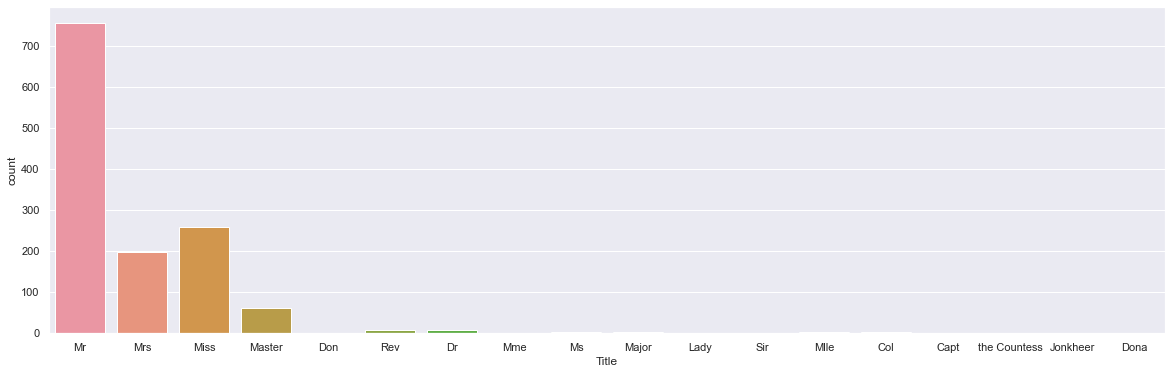

In [147]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(20,6)})
sns.countplot(x="Title", data=all_data)

In [148]:
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# map titles to category
all_data['Title_category'] = all_data['Title'].map(title_dict)

<AxesSubplot:xlabel='Title_category', ylabel='count'>

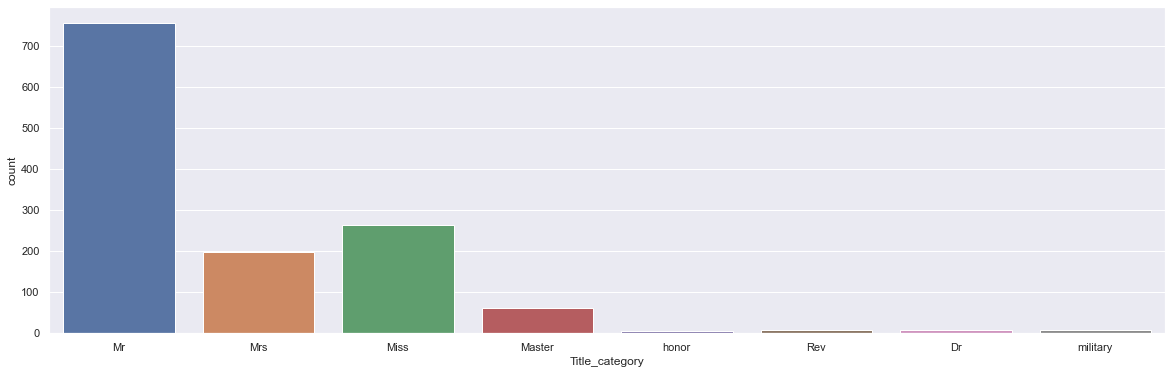

In [152]:

sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(20,6)})
sns.countplot(x="Title_category", data=all_data)



In [163]:
all_data.groupby(["Title_category",'Survived'])['Title'].count().reset_index()

,Title_category,Survived,Title
0,Dr,0.0,4
1,Dr,1.0,3
2,Master,0.0,17
3,Master,1.0,23
4,Miss,0.0,55
5,Miss,1.0,130
6,Mr,0.0,436
7,Mr,1.0,81
8,Mrs,0.0,26
9,Mrs,1.0,100


<AxesSubplot:xlabel='Title_category'>

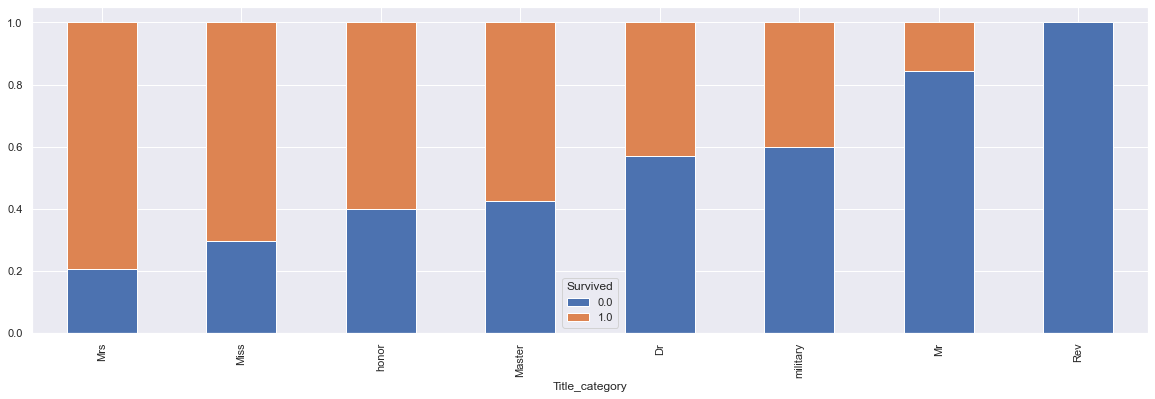

In [166]:
all_data.groupby('Title_category')['Survived'].value_counts(normalize=True).unstack().sort_values(by=1,ascending=False).plot(kind='bar',stacked='True')

##### Obervation:
- Max survival percentage was in the Mrs and Miss category
- All Passengers in the Reverand category died.


#### 3.1 - Name vs Pclass

<AxesSubplot:xlabel='Title_category'>

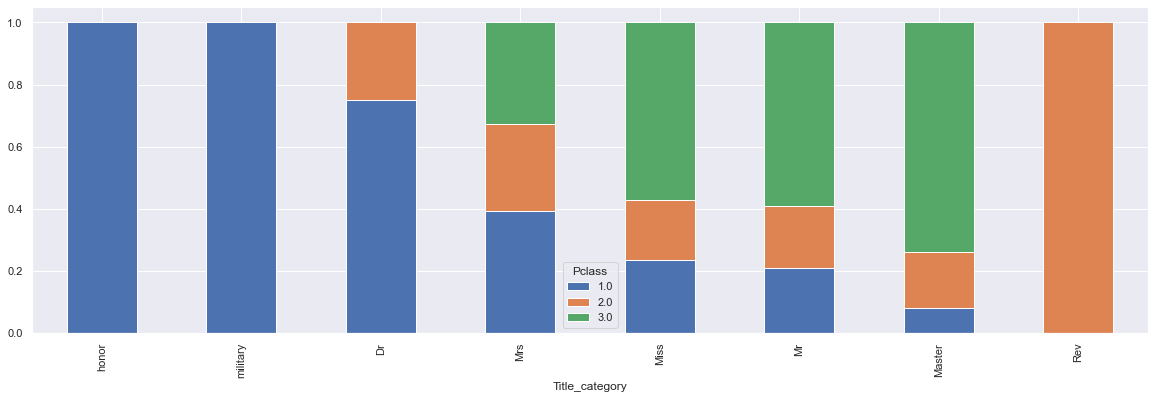

In [167]:
all_data.groupby('Title_category')['Pclass'].value_counts(normalize=True).unstack().sort_values(by=1,ascending=False).plot(kind='bar',stacked='True')

##### Obervation:
- All Honor and Military titles occupied 1st class
- All the Reverands were in the 2nd class
- The biggest percent of the 3rd class is in the Master Category.




### 4. Exploring The Variable- Cabin

In [169]:
all_data['deck'] = all_data['Cabin'].str.split('',expand=True)[1]

In [172]:
all_data.loc[all_data['deck'].isna(),'deck'] = 'U'

In [175]:
all_data.groupby('deck')['Survived'].value_counts()

deck  Survived
A     0.0           8
      1.0           7
B     1.0          35
      0.0          12
C     1.0          35
      0.0          24
D     1.0          25
      0.0           8
E     1.0          24
      0.0           8
F     1.0           8
      0.0           5
G     0.0           2
      1.0           2
T     0.0           1
U     0.0         481
      1.0         206
Name: Survived, dtype: int64

<AxesSubplot:xlabel='deck'>

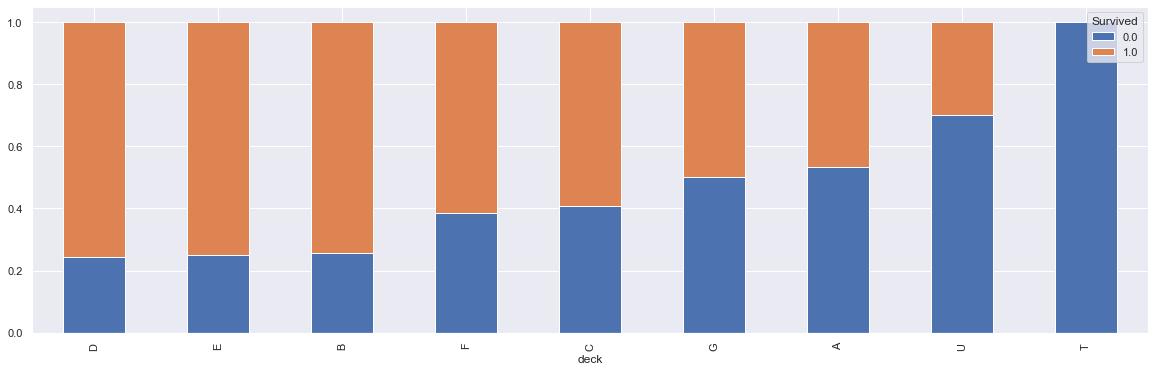

In [173]:
all_data.groupby('deck')['Survived'].value_counts(normalize=True).unstack().sort_values(by=1,ascending=False).plot(kind='bar',stacked='True')

##### Obervation:
- Most passengers donot have a cabin number.
- largest population of know cabin numbers were situated in cabi c
- Max survival rate for known cabin numbers was in cabin D, However cabin A was the closest to lifeboats.




### 5. Exploring The Variable- Embarked

/Users/lloydfernandes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



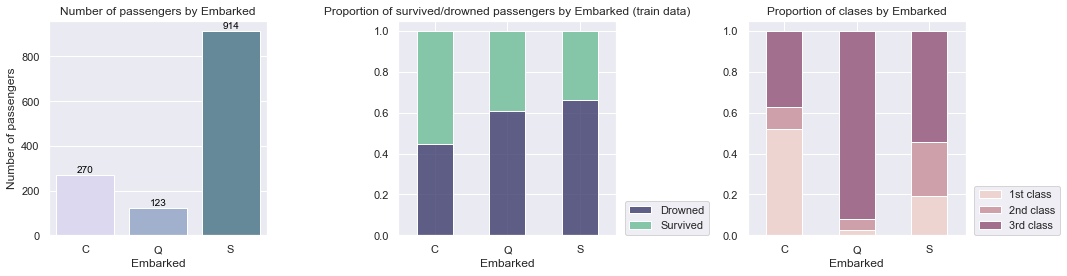

In [176]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(all_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

#### 5.1 - Embarked vs Age

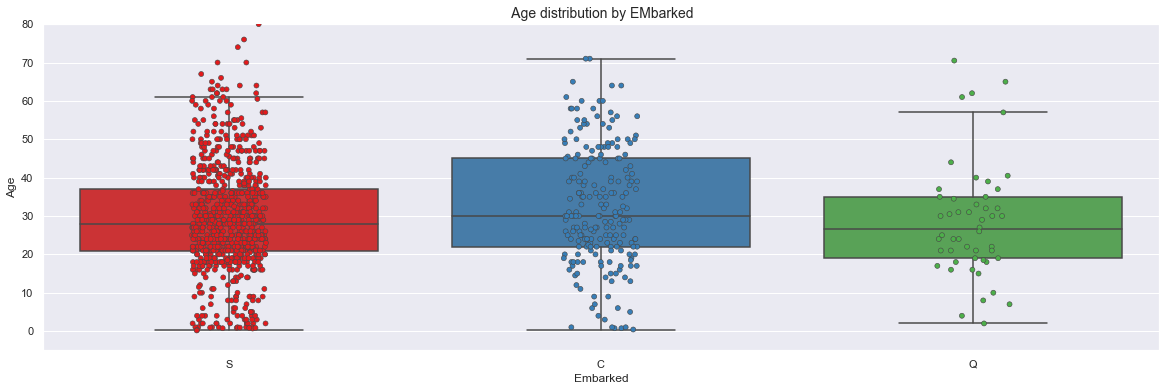

In [178]:
age= all_data[(all_data['Age']>0)]



sns.boxplot(x = 'Embarked', y = 'Age', data = age,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Embarked', y = 'Age', data = age,
     linewidth = 0.6, palette = palette)
plt.title(' Age distribution by EMbarked',fontsize= 14)
plt.ylim(-5, 80)


plt.show()

##### Observation:
- Most number of passengers(914) embarked in Southampton. Southampton has the biggest number of drowned passengers
- 270 passengers embarked in cherbourg and more than 50% of the survived(in the training dataset)
- 123 passengers embarked in Queenstown and majority of them belong to Plcass 3
- Max first class passengers came from Chergourg

### 7. Conclusion
We know that there were not enough boats on Board the Titanic for all passengers to be able to evacuate. After studying the information about the passengers, we can make some assumptions about who had a better chance of survival in a shipwreck situation as well as General observations about passengers.

- There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.
- The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.
- Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.
- Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.
- The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.
- Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.
- Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.
- However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the females survived.
- There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.
- Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.
- If we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in Cherbourg have a better chance of survival. For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.
